In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
     

In [2]:
data=pd.read_csv('mnist_train.csv')


In [3]:
rand=np.random.randint(0,data.shape[0],10000)
data=data.iloc[rand,:].reset_index()
data.drop(columns='index',inplace=True)
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels=data.iloc[:,0]
data=data.drop(columns='label',axis=1)
print(labels.shape)
print(data.shape)

(10000,)
(10000, 784)


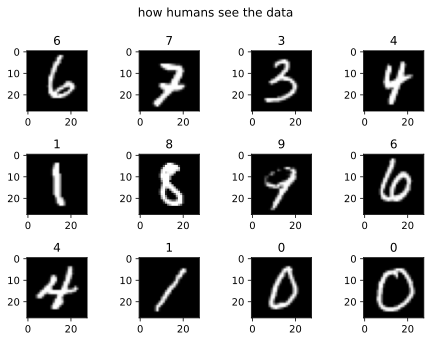

In [5]:
fig,axs=plt.subplots(3,4)
for ax in axs.flatten():
    randimg2show=np.random.randint(0,data.shape[0])
    img=np.reshape(data.iloc[randimg2show,:],(28,28))
    ax.imshow(img,cmap='gray')
    ax.set_title(f'{labels[randimg2show]}')
plt.suptitle('how humans see the data')
plt.tight_layout()
plt.show()

In [6]:
# fig,axs=plt.subplots(3,4)
# for ax in axs.flatten():
#     randimg2show=np.random.randint(0,data.shape[0])
#     ax.plot(data.iloc[randimg2show,:],'ko')
#     ax.set_title(f'the number {labels[randimg2show]}')
# plt.suptitle('how FFN sees the data sees the data')
# plt.tight_layout()
# plt.show()

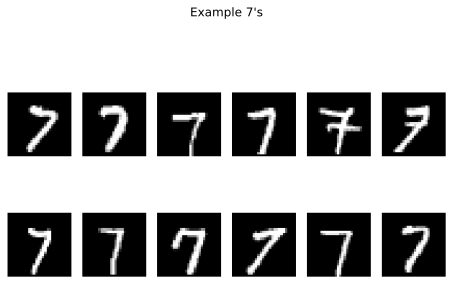

In [7]:
idx=np.where(labels==7)[0]
fig,axs=plt.subplots(2,6)
for i,ax in enumerate(axs.flatten()):
    img=np.reshape(data.iloc[idx[i],:],(28,28))
    ax.imshow(img,cmap='gray')
    ax.axis('off')
plt.suptitle("Example 7's")
plt.tight_layout()
plt.show()

In [8]:
# idx=np.where(labels==7)[0]
# fig,axs=plt.subplots(2,6)
# for i,ax in enumerate(axs.flatten()):
#     img=data.iloc[idx[i],:]
#     ax.plot(img,'ko')
#     ax.axis('off')
# plt.suptitle("Example 7's")
# plt.tight_layout()
# plt.show()

(1016, 784)


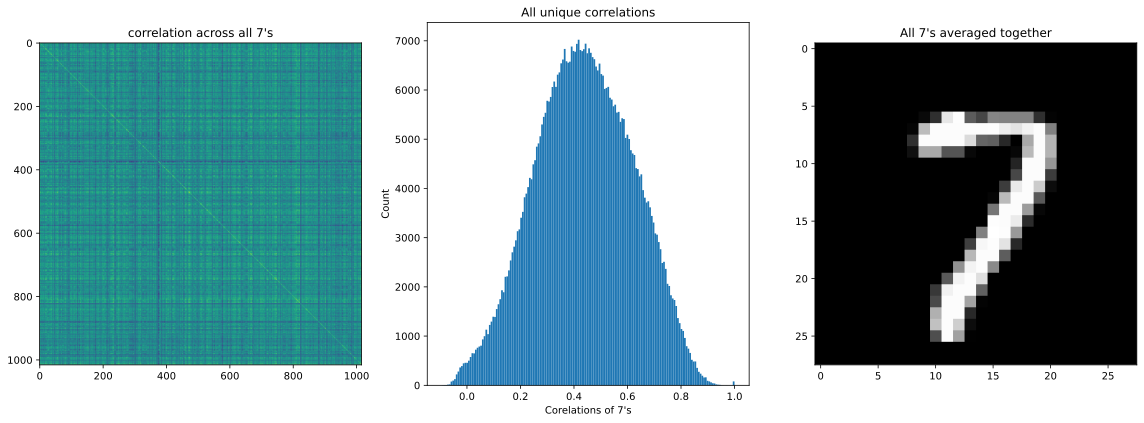

In [21]:
print(data.iloc[idx,:].shape)
C=np.corrcoef(data.iloc[idx,:])
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].imshow(C)
ax[0].set_title("correlation across all 7's")
uniqueCs=np.triu(C,k=1).flatten()
ax[1].hist(uniqueCs[uniqueCs!=0],bins='fd')
ax[1].set_title('All unique correlations')
ax[1].set_xlabel("Corelations of 7's")
ax[1].set_ylabel("Count")
aveAll7s=np.reshape(np.mean(data.iloc[idx,:],axis=0),(28,28))
ax[2].imshow(img,cmap='gray')
ax[2].set_title("All 7's averaged together")
plt.tight_layout()

In [15]:
np.triu(C,k=1).flatten()

array([0.        , 0.69200228, 0.34952753, ..., 0.        , 0.        ,
       0.        ])

(784,)